<a href="https://colab.research.google.com/github/LazaroR-u/BEDU_MachineLearning_Equipo9/blob/main/tasks/task_1_GSoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GSoC 2023 ML4SCI QML-HEP Tasks


**Diaz Lievano Lazaro Raul**


## Task I: Quantum Computing Part

### Task statement

1) Implement a the following simple quantum circuit:

    1. With 5 qubits.

    2. Apply Hadamard operation on every qubit.

    3. Apply CNOT operation on (0, 1), (1, 2), (2, 3), (3, 4).

    4. SWAP (0, 4).

    5. Rotate X with pi/2 on any qubit.

    6. Plot the circuit.

2) Implement a second circuit with a framework of your choice:

    1. Apply a Hadmard gate to the first qubit.

    2. Rotate the second qubit by pi/3 around X.

    3. Apply a Hadamard gate to the third and fourth qubit.

    4. Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>.

# Subtask 1

## Implementation with CIRQ

In [1]:
%%capture
pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
INFO: pip is looking at

In [2]:
import cirq
import math
from cirq.contrib.svg import SVGCircuit as plot_circuit


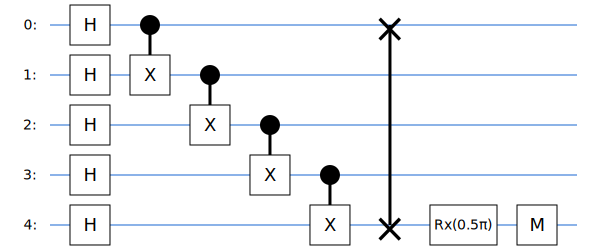

In [3]:
# Define the 5 qubits
qubits = cirq.LineQubit.range(5)

# Define the circuit
circuit1 = cirq.Circuit(
    # Hadamard on every qubit
    cirq.H.on_each(*qubits),

    # CNOT on (0, 1), (1, 2), (2, 3), (3, 4)
    cirq.CNOT(qubits[0], qubits[1]),
    cirq.CNOT(qubits[1], qubits[2]),
    cirq.CNOT(qubits[2], qubits[3]),
    cirq.CNOT(qubits[3], qubits[4]),

    # SWAP (0, 4)
    cirq.SWAP(qubits[0], qubits[4]),

    # Rotate the last qubit by pi/2 around X
    cirq.rx(math.pi / 2).on(qubits[4]),

    cirq.measure(qubits[4])
)

# Plot the circuit
plot_circuit(circuit1)

In [5]:
simulator = cirq.Simulator()
reps = 1_000_000
result = simulator.run(circuit1, repetitions=reps).data
dict(result.iloc[:,0].value_counts()/reps)

{0: 0.500218, 1: 0.499782}

## implementation with QISKIT

In [6]:
%%capture
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.6 MB/s eta 0:00:00


In [7]:
%%capture

pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=a85d84f61c69d10151750ea4e8df131c894fc822488b17bee1cf46b26a02387c
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [8]:
import qiskit
import pandas as pd
import numpy as np


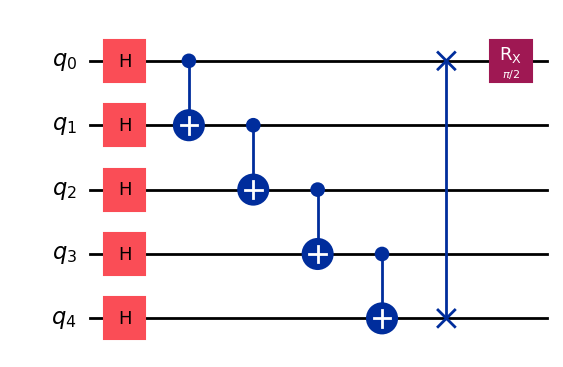

In [12]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 5 qubits
circuit = QuantumCircuit(5)

# Apply Hadamard operation on every qubit
for qubit in range(5):
    circuit.h(qubit)

# Apply CNOT operation on (0, 1), (1, 2), (2, 3), (3, 4)
for i in range(4):
    circuit.cx(i, i+1)

# SWAP (0, 4)
circuit.swap(0, 4)

# Rotate X with pi/2 on any qubit
circuit.rx(np.pi/2, 0)

# Plot the circuit
circuit.draw(output="mpl")

# Execute the circuit on a simulator
#backend = Aer.get_backend('qasm_simulator')
#result = execute(circuit, backend)

# Print the results
#print(result.get_data())


## Implementation with Pennylane

In [13]:
%%capture
pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 34.2 MB/s eta 0:00:00


In [14]:
import pennylane as qml
from pennylane import numpy as np

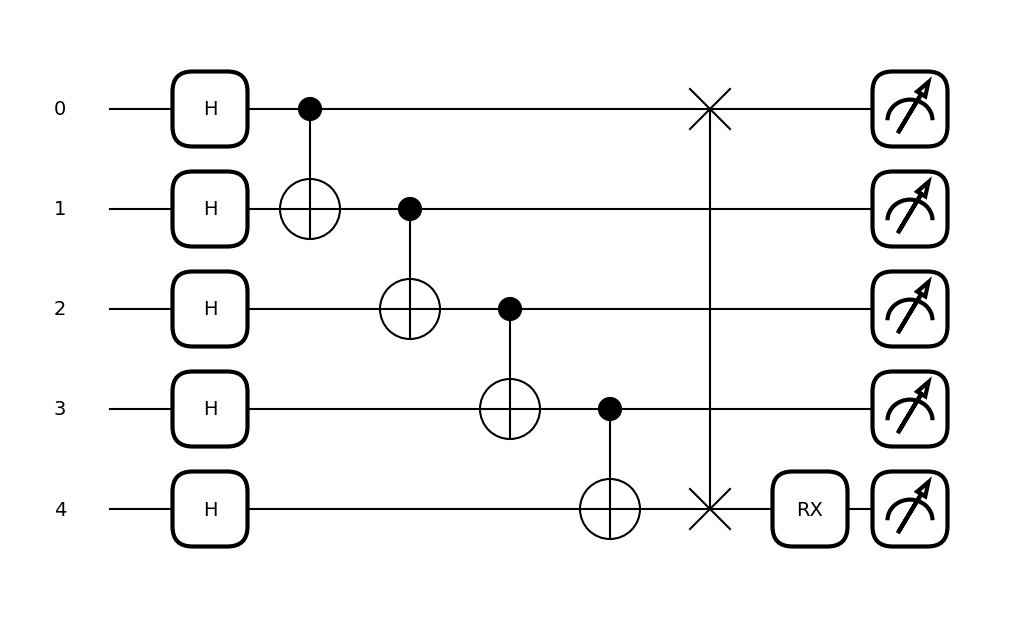

In [15]:
# Define the device and number of wires
dev = qml.device("default.qubit", wires=5)

# Define the circuit
@qml.qnode(dev)
def circuit1():
    # Hadamard on every qubit
    for i in range(len(dev.wires)):
        qml.Hadamard(wires=i)

    # CNOT on (0, 1), (1, 2), (2, 3), (3, 4)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 4])

    # SWAP (0, 4)
    qml.SWAP(wires=[0, 4])

    # Rotate the last qubit by pi/2 around X
    qml.RX(np.pi/2, wires=4)

    # Circuits in PennyLane must return measurements
    return qml.probs()

qml.draw_mpl(circuit1)();

In [16]:
len(dev.wires)

5

# Subtask 2

## Implementation with Cirq

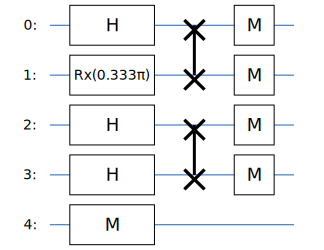

In [17]:
qubits2 = cirq.LineQubit.range(5)

circuit2 = cirq.Circuit(
    # Hadamard on first qubit
    cirq.H(qubits2[0]),

    # Rotate the second qubit by pi/3 around X
    cirq.rx(math.pi / 3).on(qubits2[1]),

    #apply hadamart gate to the third and fourth qubit
    cirq.H(qubits2[2]),
    cirq.H(qubits2[3]),

    # SWAP (0, 1), (2,3)
    cirq.SWAP(qubits2[0], qubits2[1]),
    cirq.SWAP(qubits2[2], qubits2[3]),

    cirq.measure_each(qubits2)
)

# Plot the circuit
plot_circuit(circuit2)


In [18]:
simulator = cirq.Simulator()
reps = 1_000_000
result = simulator.run(circuit2, repetitions=reps).data

for i in range(len(qubits2)):
  print(f"qubit {i}: {dict(result.iloc[:,i].value_counts()/reps)}")


qubit 0: {0: 1.0}
qubit 1: {0: 0.75012, 1: 0.24988}
qubit 2: {1: 0.500381, 0: 0.499619}
qubit 3: {1: 0.50105, 0: 0.49895}
qubit 4: {1: 0.500032, 0: 0.499968}


## Implementation with Pennylane

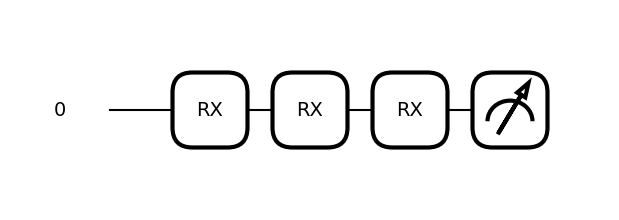

In [33]:
dev = qml.device("default.qubit", wires = 1)

@qml.qnode(dev)

def circuit(parameter, n):
  for i in range(n):
    qml.RX(parameter[i], wires=0)

  return qml.probs()

qml.draw_mpl(circuit)([1,2,3], 3);

[0.42150329 0.57849671]


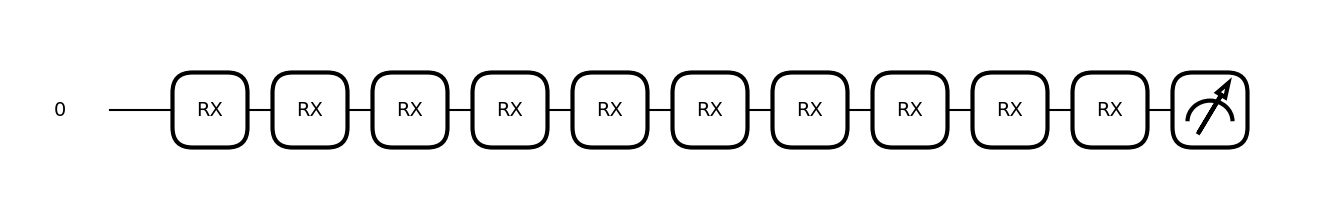

In [43]:
import random
n_parameters = 10
params = [random.uniform(0, 1) for _ in range(n_parameters)]

print(circuit( params, n_parameters))
qml.draw_mpl(circuit)(params, n_parameters);

In [44]:
print(qml.draw(circuit)(params, n_parameters))


0: ──RX(0.07)──RX(0.96)──RX(0.70)──RX(0.16)──RX(0.49)──RX(0.48)──RX(0.09)──RX(0.44)──RX(0.45)

───RX(0.73)─┤  Probs


42% of measure the state in the $|0>$ state.